<a href="https://colab.research.google.com/github/atefehhaji/HW/blob/master/Atefeh_ML_%E2%85%AFiniProje%E2%85%BDt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier





**Load MNIST Data Set**

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['mnist_test.csv']))
# Dataset is now stored in a Pandas Dataframe


Saving mnist_test.csv to mnist_test.csv


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df_train = pd.read_csv(io.BytesIO(uploaded['mnist_train.csv']))
# Dataset is now stored in a Pandas Dataframe


Saving mnist_train.csv to mnist_train.csv


In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

/bin/bash: google-drive-ocamlfuse: command not found


In [ ]:
import sys
sys.path.append('drive/Project')


In [ ]:
df_train.save('drive/Project/myModel.h5')


AttributeError: ignored

In [ ]:
df_train.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


9

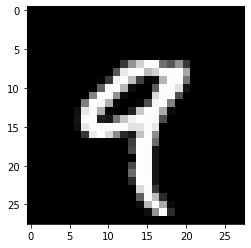

In [ ]:
df_array_train = df_train.to_numpy()
X_train_original = df_array_train[:,1:]
plt.imshow(X_train_original[4].reshape(28,28), cmap='gray')
Y_train_original = df_array_train[:,0]
Y_train_original[4]

255

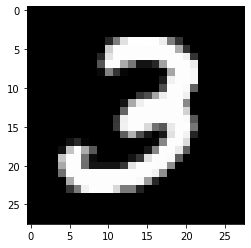

In [ ]:

df_array_train_prm = df_array_train[np.random.RandomState(seed=42).permutation(df_array_train.shape[0])]
X_train = df_array_train_prm[:,1:]
Y_train = df_array_train_prm[:,0]
df_array_train_prm.shape
plt.imshow(X_train[4].reshape(28,28), cmap='gray')
#print('X4 =',  X_train[4],)
np.max(X_train)
#Y_train[4]

**Normalize Data**

In [ ]:
X_train = X_train/255

**Split the Dataset into Train and Validation**

In [ ]:
X_train_train = X_train[ :4800,:]
Y_train_train = Y_train[: 4800]

X_train_validation = X_train[4800:6000,: ]
Y_train_validation = Y_train[4800:6000]

In [ ]:
X_train_train.shape

(4800, 784)

In [ ]:
Y_train_train.shape

(4800,)

In [ ]:
X_train_validation.shape

(1200, 784)

In [ ]:
Y_train_validation.shape

(1200,)

# Test Set

In [ ]:
df_array_test = df.to_numpy()
X_test = df_array_test[:,1:]
Y_test = df_array_test[:,0]
X_test = X_test/255
print(X_test.shape)
print(Y_test.shape)

(10000, 784)
(10000,)


In [ ]:
import pickle
with open('train.pickle', 'wb') as f:
      pickle.dump([X_train_train, Y_train_train, X_train_validation,Y_train_validation, X_test, Y_test], f)


In [ ]:
with open('train.pickle', 'rb') as f:
   X_train_train, Y_train_train, X_train_validation,Y_train_validation, X_test, Y_test = pickle.load(f)

# **LogisticRegression**


Resize the Dataset

In [ ]:
# size=14
# X_train_train_re = [cv2.resize(img, dsize=(size, size)) for img in X_train_train]
# X_train_validation_re = [cv2.resize(img, dsize=(size, size)) for img in X_train_validation]
    
 
# X_train_train_re = [x.reshape(size*size) for x in X_train_train_re]
# X_train_validation_re = [x.reshape(size*size) for x in X_train_validation_re]

In [ ]:
clf = LogisticRegression(random_state=42, max_iter=700, verbose=1, multi_class='ovr', n_jobs=-1)
clf.fit(X_train_train, Y_train_train)

In [ ]:
clf.score(X_train_train, Y_train_train)

In [ ]:
train_acc_LR = []
test_acc_LR = []
itr_LR =[]
for itr in range(10, 500, 50):
  clf_LR = LogisticRegression(random_state=42, max_iter=itr, verbose=0, multi_class='ovr', n_jobs=-1)
  clf_LR.fit(X_train_train, Y_train_train)
  train_acc_LR.append(clf_LR.score(X_train_train, Y_train_train))
  test_acc_LR.append(clf_LR.score(X_train_validation, Y_train_validation))
  itr_LR.append(itr)
  


In [ ]:
plt.plot(itr_LR, train_acc_LR, 'b*-', label = 'Train')
plt.plot(itr_LR, test_acc_LR, 'r-', label = 'Validation')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Iterations')
print(test_acc_LR)

# **KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_train, Y_train_train)

In [ ]:
knn.score(X_train_train, Y_train_train)

In [ ]:
score_train = []
score_test = []
num_neighbors =[]
for k in range(1,20,1):
  my_knn = KNeighborsClassifier(n_neighbors=k)
  my_knn.fit(X_train_train, Y_train_train)
  num_neighbors.append(k)
  score_test.append(my_knn.score(X_train_validation, Y_train_validation))
  score_train.append(my_knn.score(X_train_train, Y_train_train))

In [ ]:
plt.plot(  score_train, 'b*-', label = 'Train')
plt.plot(score_test, 'r-', label = 'Validation')
plt.legend()
plt.ylabel('Score')
plt.xlabel('n_neighbors')


In [ ]:
np.max(score_train)

In [ ]:
num_neighbors_opt = num_neighbors[np.argmax(score_test)]
num_neighbors_opt

In [ ]:
#score_train
print('Optimum Numbers of Neighbors = ', num_neighbors[np.argmax(score_test)])
print('Optimum Score = ', np.max(score_test))

In [ ]:
my_knn_opt = KNeighborsClassifier(n_neighbors=num_neighbors_opt)
my_knn_opt.fit(X_train_train, Y_train_train)

my_knn_opt.score(X_test,Y_test)

# **Perceptron**

In [ ]:
perceptron = Perceptron(verbose=0)

In [ ]:
perceptron.fit(X_train_train, Y_train_train)

In [ ]:
perceptron.score(X_train_train, Y_train_train)

In [ ]:
score_train_perceptron = []
alpha_set = [0.00001, 0.0001, 0.001, 0.01, 0.01]
for k in alpha_set:
  perceptron = Perceptron(verbose=0, alpha=k)
  perceptron.fit(X_train_train, Y_train_train)
  score_train_perceptron.append(perceptron.score(X_train_validation, Y_train_validation))

In [ ]:
score_train_perceptron

In [ ]:
#score_train
print('Optimum alpha = ', alpha_set[np.argmax(score_train_perceptron)])
print('Optimum Score for Perceptron = ', np.max(score_train_perceptron))

In [ ]:
perceptron.fit(X_train_train, Y_train_train)

perceptron.score(X_test,Y_test)

# **MLP**

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50,), max_iter=1000)

In [ ]:
mlp.fit(X_train_train, Y_train_train)

In [ ]:
mlp.score(X_train_train, Y_train_train)

Hidden Layer Size

In [ ]:
score_train_MLP = []
hidden_layer_size_set =[]
for k in range(5,50,5):
  mlp = MLPClassifier(hidden_layer_sizes=k, max_iter=1000) 
  mlp.fit(X_train_train, Y_train_train)
  score_train_MLP.append(mlp.score(X_train_validation, Y_train_validation))
  hidden_layer_size_set.append(k)

In [ ]:
print('Optimum Layer Size = ', hidden_layer_size_set[np.argmax(score_train_MLP)])
print('Optimum Score for MLP = ', np.max(score_train_MLP))

In [ ]:
mlp_opt_layer_size = MLPClassifier(hidden_layer_sizes=45, max_iter=1000) 

mlp_opt_layer_size.fit(X_train_train, Y_train_train)

mlp_opt_layer_size.score(X_test,Y_test)

Iteration


In [ ]:
score_train_MLP = []
Iteration_set =[]
for k in range(500,2000,250):
  mlp = MLPClassifier(hidden_layer_sizes=45, max_iter=k) 
  mlp.fit(X_train_train, Y_train_train)
  score_train_MLP.append(mlp.score(X_train_validation, Y_train_validation))
  Iteration_set.append(k)

In [ ]:
print('Optimum Iteration = ', Iteration_set[np.argmax(score_train_MLP)])
print('Optimum Score for MLP = ', np.max(score_train_MLP))

Activation

In [ ]:
activations = np.array(['identity', 'logistic', 'tanh', 'relu'])
param_grid = dict(activation =activations)

mlp = MLPClassifier(hidden_layer_sizes=45, max_iter=1000) 
grid = GridSearchCV(estimator=mlp, param_grid=param_grid)
grid.fit(X_train_train, Y_train_train)

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_.activation)

Solver


In [ ]:
solvers = np.array(['lbfgs', 'sgd', 'adam'])
param_grid = dict(solver =solvers)

mlp = MLPClassifier(hidden_layer_sizes=45, max_iter=1000) 
grid = GridSearchCV(estimator=mlp, param_grid=param_grid)
grid.fit(X_train_train, Y_train_train)

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_.solver)

Exastive Search 

In [ ]:
score_test_MLP =[]
score_train_MLP = []
hidden_layer_size_set =[]
Iteration_set =[]
activations = np.array(['identity', 'logistic', 'tanh', 'relu'])
activations_set =[]
solvers = np.array(['lbfgs', 'sgd', 'adam'])
solvers_set = []
alphas = [0.00001, 0.0001, 0.001, ]#0.01, 0.1]
alpha_set=[]
for alphaa in alphas:
  for solv in solvers:
    for act in activations:
      for itr in range(500,1000,250):
        for k in  range(10,50,10): #range(5,50,5):
          #mlp = MLPClassifier(hidden_layer_sizes=k, activation=act, solver=solv, alpha=alphaa, max_iter=itr) 
          mlp = MLPClassifier(hidden_layer_sizes=k, alpha=alphaa, max_iter=itr) 

          mlp.fit(X_train_train, Y_train_train)
          score_test_MLP.append(mlp.score(X_train_validation, Y_train_validation))
          score_train_MLP.append(mlp.score(X_train_train, Y_train_train))
          hidden_layer_size_set.append(k)
          Iteration_set.append(itr)
          activations_set.append(act)
          solvers_set.append(solv)
          alpha_set.append(alphaa)

In [ ]:
score_test_MLP =[]
score_train_MLP = []
hidden_layer_size_set =[]
Iteration_set =[]
activations = np.array(['identity', 'logistic', 'tanh', 'relu'])
activations_set =[]
solvers = np.array(['lbfgs', 'sgd', 'adam'])
solvers_set = []
#alphas = [0.00001, 0.0001, 0.001, ]#0.01, 0.1]
alpha_set=[]
for itr in range(500,1000,250):
  for k in  range(10,50,10): #range(5,50,5):
    mlp = MLPClassifier(hidden_layer_sizes=k,  max_iter=itr) 
    mlp.fit(X_train_train, Y_train_train)
    score_test_MLP.append(mlp.score(X_train_validation, Y_train_validation))
    score_train_MLP.append(mlp.score(X_train_train, Y_train_train))
    hidden_layer_size_set.append(k)
    Iteration_set.append(itr)
          #activations_set.append(act)
          #solvers_set.append(solv)
          #alpha_set.append(alphaa)

Text(0.5, 0, 'hidden layer size')

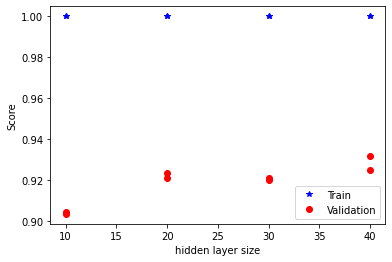

In [ ]:
plt.plot(hidden_layer_size_set,  score_train_MLP, 'b*', label = 'Train')
plt.plot(hidden_layer_size_set, score_test_MLP, 'ro', label = 'Validation')
plt.legend()
plt.ylabel('Score')
plt.xlabel('hidden layer size')

In [ ]:
print('Iteration = ', Iteration_set[np.argmax(score_test_MLP)])
print('hidden_layer_size_set = ', hidden_layer_size_set[np.argmax(score_test_MLP)])



Iteration =  750
hidden_layer_size_set =  40


# **SVM**

In [ ]:
svm = SVC(C=1.0, kernel='linear', probability=True)
svm.fit(X_train_train, Y_train_train)

In [ ]:
score_train_SVM = []
score_test_SVM = []
kernel_set =np.array(['linear', 'poly', 'rbf', 'sigmoid'])

for k in kernel_set:
  print(k)
  svm = SVC(C=1.0, kernel=k, probability=True)
  svm.fit(X_train_train, Y_train_train)
  score_test_SVM.append(svm.score(X_train_validation, Y_train_validation))
  score_train_SVM.append(svm.score(X_train_train, Y_train_train))

 

linear
poly
rbf
sigmoid


In [ ]:
print('Optimum Kernel = ', kernel_set[np.argmax(score_test_SVM)])
print('Optimum Score for MLP = ', np.max(score_test_SVM))

Optimum Kernel =  rbf
Optimum Score for MLP =  0.9641666666666666


Text(0, 0.5, 'Score')

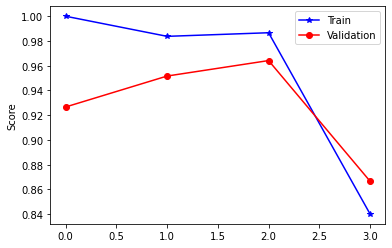

In [ ]:
plt.plot(  score_train_SVM, 'b*-', label = 'Train')
plt.plot(score_test_SVM, 'ro-', label = 'Validation')
plt.legend()
plt.ylabel('Score')


In [ ]:
  svm = SVC(C=1.0, kernel='rbf', probability=True)


In [ ]:
svm.fit(X_train_train, Y_train_train)

svm.score(X_test,Y_test)

# **DT**

In [ ]:
score_train_dt = []
score_test_dt=[]
num_trees =[]
num_max_sample = []
for k in range(20,100,10):
  for s in range(50,300,50):
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=k,  max_samples=s, n_jobs=-1)
    clf.fit(X_train_train, Y_train_train)
    score_test_dt.append(clf.score(X_train_validation, Y_train_validation))
    score_train_dt.append(clf.score(X_train_train, Y_train_train))

    num_trees.append(k)
    num_max_sample.append(s)


Optimum number of trees = 90  and Optimum number of max_sample =50
Optimum Score for DT =  0.7191666666666666


In [ ]:
print('Optimum number of trees = {}  and Optimum number of max_sample ={}' .format(num_trees[np.argmax(score_test_dt)], num_max_sample[np.argmax(score_test_dt)]))
print('Optimum Score for DT = ', np.max(score_test_dt))

Optimum number of trees = 90  and Optimum number of max_sample =50
Optimum Score for DT =  0.7191666666666666


Text(0, 0.5, 'Score')

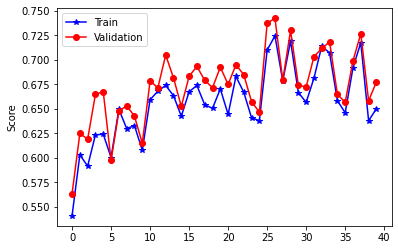

In [ ]:
plt.plot( score_train_dt, 'b*-', label = 'Train')
plt.plot(score_test_dt, 'ro-', label = 'Validation')
plt.legend()
plt.ylabel('Score')

# **Random Forest**

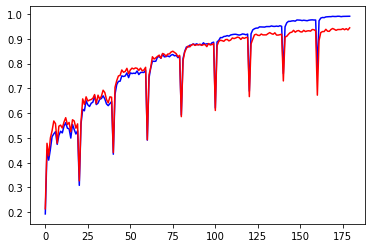

In [ ]:
train_acc = []
test_acc = []
n_list =[]
depth_list = []
for depth in range(1, 10, 1):
  for n in range(1, 200, 10):
      clf = RandomForestClassifier(n_estimators=n, max_depth=depth, n_jobs=-1)
      clf.fit(X_train_train, Y_train_train)
      
      train_acc.append(clf.score(X_train_train, Y_train_train))
      test_acc.append(clf.score(X_train_validation, Y_train_validation))
      n_list.append(n)
      depth_list.append(depth)
plt.plot(train_acc, 'b-')
plt.plot(test_acc, 'r-')

In [ ]:
print('Optimum n_estimators = ', n_list[np.argmax(test_acc)])
print('Optimum depth = ', depth_list[np.argmax(test_acc)])
print('Optimum Score of Validation = ', np.max(test_acc))
print('Train Score', train_acc[np.argmax(test_acc)])
